# 12/21 (THU)

In [ ]:
import json # json parsing library
import pandas as pd

path = "/home/dongsu/practice/pydata-book/datasets/bitly_usagov/example.txt"

records = [json.loads(line) for line in open(path)] # list comprehension
# json object --> dictionary / json arrary --> list / json string --> string

In [32]:
# Magic Command
%config IPCompleter.greedy=True
%matplotlib inline

### pd.DataFrame.info()

### column.value_counts() : value 별로 총 갯수를 count

## .fillna("원하는 문자") : NA 값을 원하는 문자로 채워줌

In [18]:
frame[frame.tz == ""] = "Unknown"
# frame['tz'] = frame['tz'].replace("","Unknown") 

# 12/22 (FRI)

## plot(kind="bar"/"barh", rot=0) : barh = 수평막대 / rot = rotation for ticks(y-axis)

## dropna()

In [40]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()]) # 첫번째 문자열 토큰만 취하고 시리즈로 변경

In [44]:
cframe = frame[frame.a.notnull()]

## np.where(boolean, true 일때 실행, false 일때 실행) --> array 반환

In [46]:
import numpy as np
operating_system = np.where(cframe['a'].str.contains('Windows'), "Windows", "Not Windows") 

## groupby 의 합계 : size() --> unstack() 이용해 table로 재배치

## sum(index:0, column:1) / argsort() : sort해서 반환하되 원래의 index를 반환

In [79]:
indexer = agg_counts.sum(1).argsort() # 합의 크기순으로 정렬하여 index를 반환

In [83]:
count_subset = agg_counts.take(indexer)[-10:] # 인덱스대로 반환하여 상위 10개만 선택

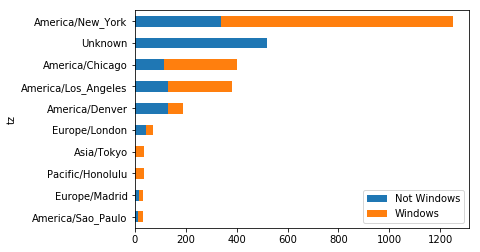

In [95]:
count_subset.plot(kind="barh", stacked=True) # stacked : 누적막대 그래프 

In [98]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0) # 비율을 보기위해 총합을 1로 맞춤

## pd.merge(df1, df2) : 공통 column 기준으로 병합

## iloc[] : approach row with index position
## loc[] : approach row with index label

## df.pivot_table(값 , index=, columns=, aggfunc=)

In [123]:
# title을 인덱스로, 컬럼을 gender로 하여 rating의 mean을 구하는 피벗테이블 작성
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')

## sort_values(by='column', ascending=T or F) : 값에 따라 정렬

In [149]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)

In [159]:
sorted_by_diff[::-1] # 역순으로 정렬

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787


In [163]:
rating_std_by_title = data.groupby('title')['rating'].std() # 표준편차

In [2]:
import pandas as pd

In [3]:
years = range(1880, 2011)

pieces = []
columns = ['name','sex','births']

for year in years:
    path = "~/practice/pydata-book/datasets/babynames/yob%d.txt" % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame) # 빈 리스트에 append를 이용하여 dataframe을 넣고, pd.concat 으로 dataframe을 합친다.
    
names = pd.concat(pieces, ignore_index=True)    

In [6]:
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group

In [7]:
names = names.groupby(['year','sex']).apply(add_prop)

In [11]:
import numpy as np

In [12]:
np.allclose(names.groupby(['year','sex']).prop.sum(), 1) # group 연산에서 열의 합이 1인지 확인

True

In [13]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

## DataFrame[['col_1', 'col_2', ....    'col_n']] : 여러개의 컬럼만을 뽑아서 df으로 반환

## plot(subplots = True : 개별 plot, figsize=(x,y), grid=False, Title="something" )

## plot(title="something", yticks=np.linspace(start,stop,갯수), xticks=range(start,stop-1,step))

## column.cumsum().values.searchsorted(x) : 컬럼의 누적합계 값이 x에 도달할 때의 index를 반환

In [74]:
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


## apply : row/column on dataframe
## mapapply : element on dataframe
## map : element of series

In [83]:
import matplotlib.pyplot as plt

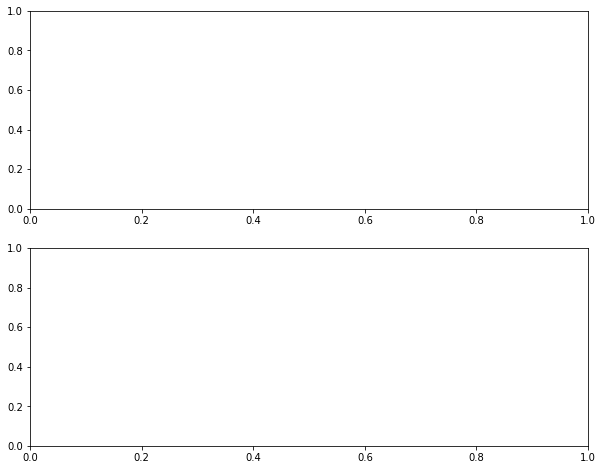

In [85]:
fig, axes = plt.subplots(2,1,figsize=(10,8)) # 추후 plot 해야함

## unique() : 유일 원소들만 뽑아내어 array로 반환

In [91]:
all_names = top1000.name.unique()

In [93]:
mask = np.array(['lesl' in x.lower() for x in all_names]) # 이름중에서 'lesl'이 포함되어 있는가

## dataframe/series.isin(somethings) : value가 somethings 안에 포함되어 있나 - T or False 반환

In [103]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [111]:
table = table.div(table.sum(1), axis=0)

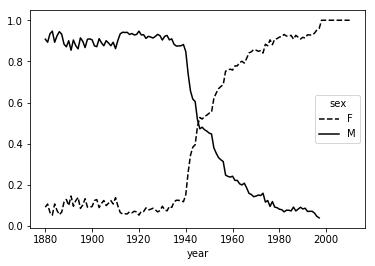

In [114]:
table.plot(style={"F":"k--","M":"k-"}) # plot(style)

## IPython - Magic Command

### ? : 객체에 대한 정보 출력 ex) b?
### %run : 스크립트 파일 실행 ex) %run something.py

# 12/26 (TUE)

## Numpy : 배열(자료형 동일)과 벡터 계산 (ndarray 제공/반환)

In [1]:
import numpy as np

In [2]:
data = np.random.randn(2,3) # 정규분포의 2X3 random number 생성 
data

array([[ 2.18407383,  0.64305432, -0.01512052],
       [ 1.35955409, -0.06136026, -0.36040958]])

In [3]:
data.shape # 차원의 크기를 튜플로 알려줌
data.ndim # 차원 크기 알려줌

(2, 3)

In [4]:
data.dtype # 배열에 저장된 자료형 알려줌

dtype('float64')

## 배열 생성 : np.array(순차적객체)

In [12]:
np.zeros(((3,6))) # 0으로 초기화 된 다차원 배열 생성

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [14]:
np.empty((2,3,2)) # 튜플을 받아 초기화 되지 않은 다차원 array 생성

array([[[  6.92097457e-310,   4.67134921e-310],
        [  0.00000000e+000,   0.00000000e+000],
        [  0.00000000e+000,   0.00000000e+000]],

       [[  0.00000000e+000,   0.00000000e+000],
        [  0.00000000e+000,   0.00000000e+000],
        [  0.00000000e+000,   0.00000000e+000]]])

In [15]:
np.arange(15) # python의 range 와 같은 역할

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## eye : Identity Matrix 생성

## ndarray.astype(np.float32) : dtype을 다른 형으로 변경

## ndarray 에서의 slicing --> view 로서 view의 변경은 원본의 변경으로 반영됨 / 복사본을 얻고 싶다면 .copy()를 사용

In [16]:
arr3d = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]]) # array[x][y] = array[x,y] 같다!!
print (arr3d[1][1]) 
print (arr3d[1,1])

[10 11 12]
[10 11 12]


## Index -- column 방향 : 0 (아래), row 방향 : 1 (옆)

In [25]:
names = np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])

In [47]:
data = np.random.randn(7,4)

In [30]:
data[names == 'Bob'] # boolean index로서 column 방향 먼저 수행되어 TRUE에 해당하는 row 가져옴

array([[-1.32676295,  0.97844274,  0.27987031,  0.53392204],
       [-0.71300485, -0.41052347, -0.36943184, -0.6486103 ]])

In [35]:
print (data[names == 'Bob', 3:]) # ndim=2
print (data[names == 'Bob', 3])  # ndim=1 *** 정수 색인과 슬라이스를 함께 사용하면 한 차원 낮은 슬라이스!!!!!

[[ 0.53392204]
 [-0.6486103 ]]
[ 0.53392204 -0.6486103 ]


In [62]:
arr[[1,5,7,2],[0,3,1,2]] # (1,0),(5,3),(7,1),(2,2) 에 대응하는 원소

array([ 4, 23, 29, 10])

In [72]:
arr[[1,5,7,2]][:,[0,3,1,2]] # arr[np.ix_([1,5,7,2],[0,3,1,2])] 와 동일

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [51]:
arr = np.arange(16).reshape((2,2,4))
arr.transpose((1,0,2)) # 원래는 (0,1,2)이므로 x축과 y축을 변경
arr.swapaxes(1,2) # 2개의 축 번호를 받아서 변경

## array.sum(axis) & array.mean(axis) 계산 후 한 차수 낮은 배열 반환

## boolean array.sum() - True 갯수 / .any() - 하나 이상 True인가 / .all() - 모두 True인가

## np.dot : 행렬곱셈

## np.random.normal(size=(N,N)) : 정규분포에서 표본생성